In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [4]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Subscription_Start_Date',
       'Subscription_Type', 'Monthly_Payment', 'Payment_Method',
       'Monthly_Hours_Watched', 'Favorite_Genre', 'Devices_Used',
       'Average_Session_Length', 'Content_ID', 'Rating_Given', 'Churned',
       'Date_of_Churn', 'Reason_for_Churn'],
      dtype='object')

In [5]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [7]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [8]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [9]:
numerical_features = df.select_dtypes(include=[np.number]).columns

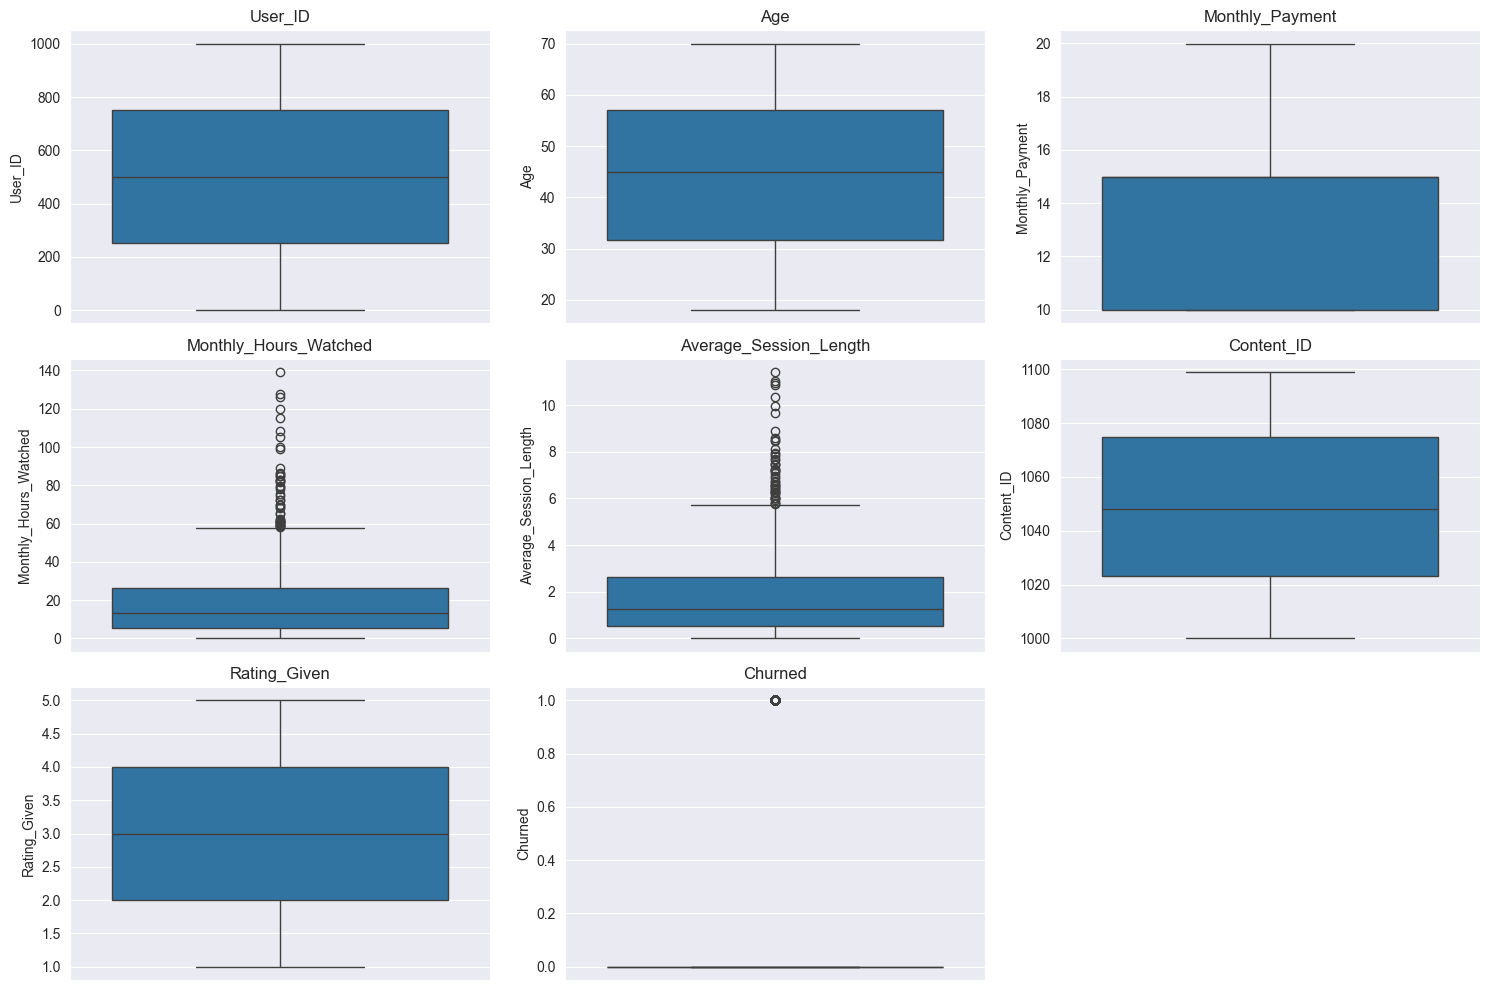

In [10]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [11]:
def detect_outliers(data):
    outliers = {}
    for feature in numerical_features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature].count()
    return outliers

outliers = detect_outliers(df)
print(outliers)

{'User_ID': 0, 'Age': 0, 'Monthly_Payment': 0, 'Monthly_Hours_Watched': 45, 'Average_Session_Length': 49, 'Content_ID': 0, 'Rating_Given': 0, 'Churned': 246}


In [12]:
# Display Outliers by using upper and lower bound method.
def display_outliers_with_bounds(data):
    outliers_list = []
    bounds = {}
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[feature] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers_list.append(outliers)
    outliers_data = pd.concat(outliers_list).drop_duplicates()
    return outliers_data, bounds

outliers_data, bounds = display_outliers_with_bounds(df)
print(outliers_data)
print("\nBounds for identifying outliers:")
for feature, bound in bounds.items():
    print(f"{feature}: {bound}")


     User_ID  Age  Gender Location     Subscription_Start_Date  \
3          4   32  Female     East  2022-01-04 01:53:37.657006   
6          7   38  Female  Central  2021-02-06 01:53:37.657039   
37        38   32  Female    South  2019-08-29 01:53:37.657381   
108      109   26  Female     East  2022-05-11 01:53:37.658194   
136      137   52    Male  Central  2023-10-18 01:53:37.658494   
..       ...  ...     ...      ...                         ...   
876      877   51  Female    South  2022-05-02 01:53:37.666616   
972      973   22  Female  Central  2020-02-22 01:53:37.667620   
975      976   43    Male    North  2023-11-18 01:53:37.667657   
976      977   63  Female  Central  2019-07-21 01:53:37.667668   
980      981   43   Other  Central  2023-06-20 01:53:37.667714   

    Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
3            Standard            14.99    Credit Card              60.244820   
6               Basic             9.99   Direct

In [13]:
# Outliers replaced by median.
def replace_outliers_with_median(data):
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = data[feature].median()
        data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature] = median_value
    return data

df_median_replaced = replace_outliers_with_median(df)


In [14]:
# Outliers replaced by 99th percentile 
def cap_outliers_at_percentile(data, percentile=99):
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        upper_bound = np.percentile(data[feature], percentile)
        data.loc[data[feature] > upper_bound, feature] = upper_bound
    return data

df_capped = cap_outliers_at_percentile(df)


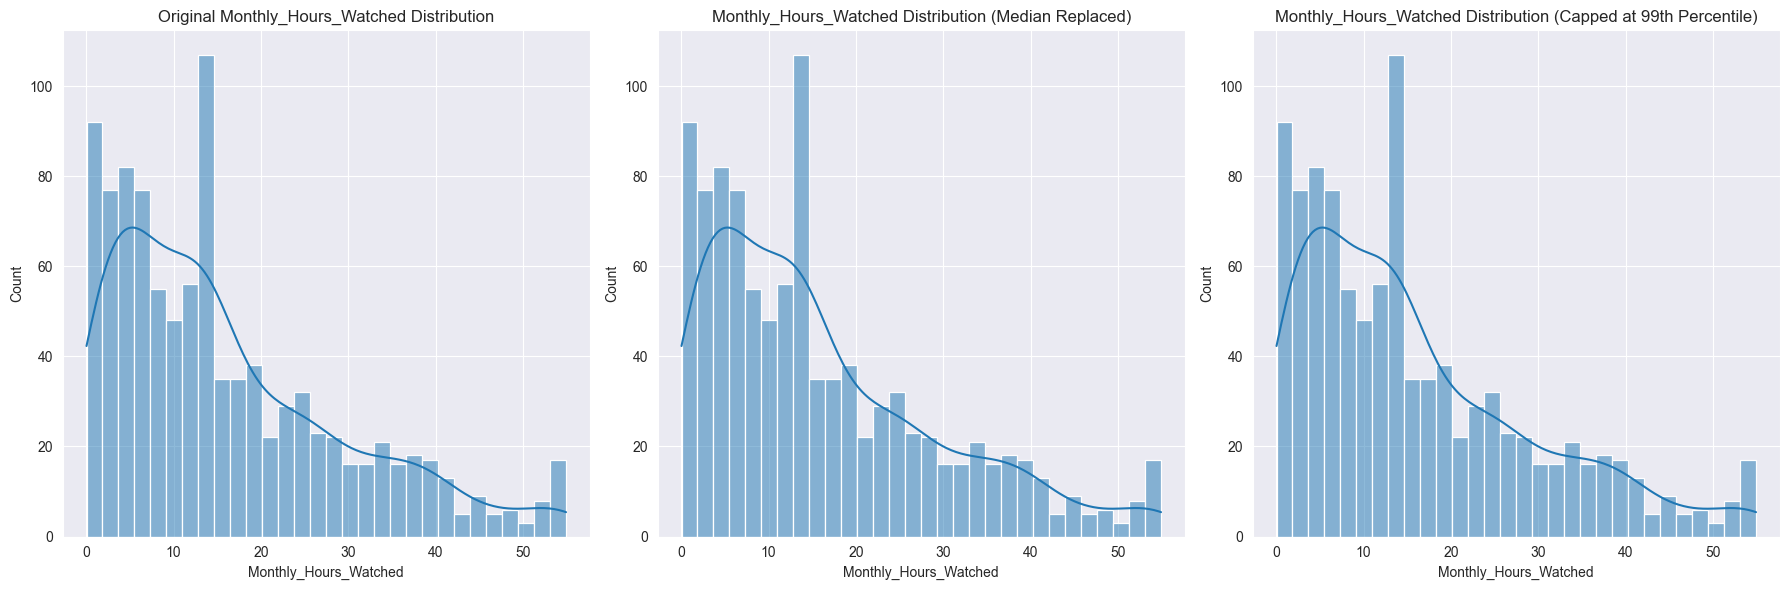

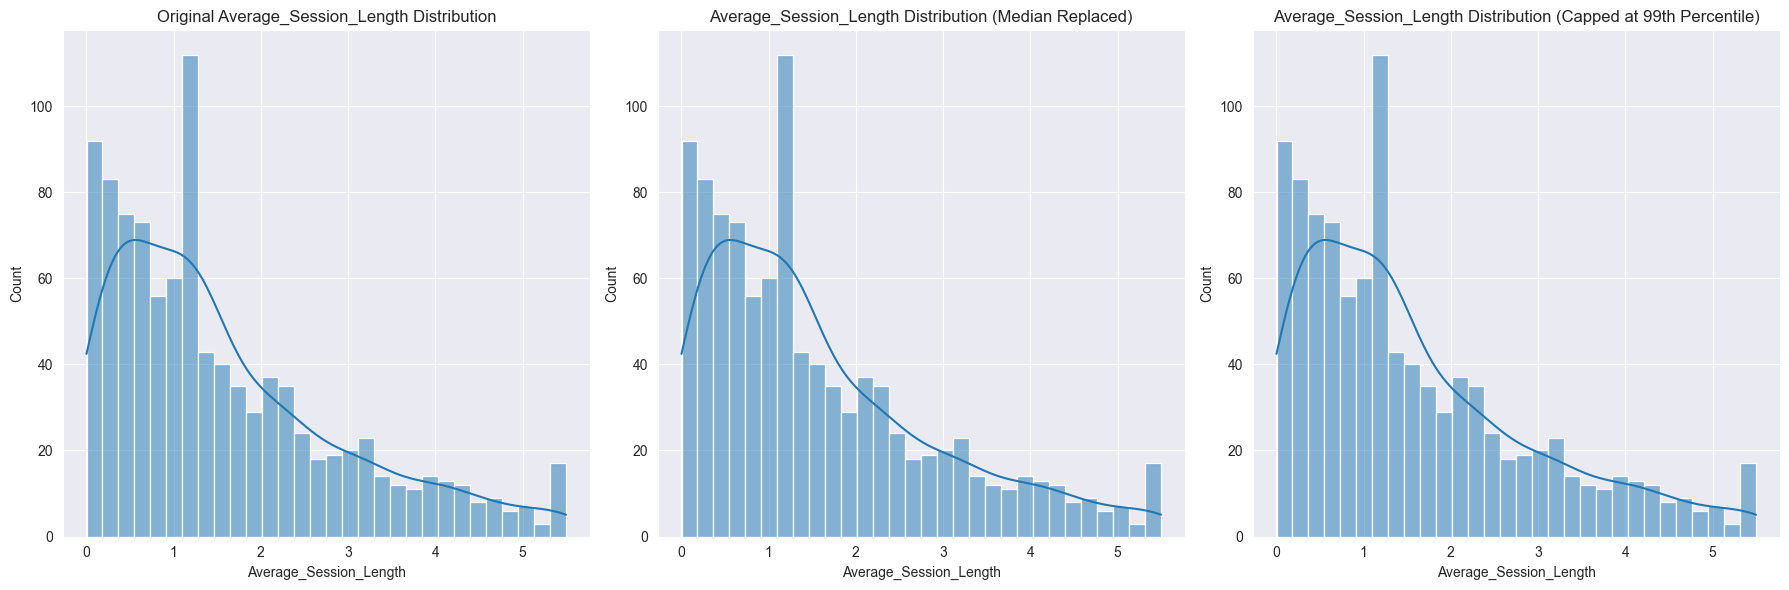

In [15]:
# Comparsion between two methods
def plot_feature_distributions(data_original, data_median, data_capped, feature):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(data_original[feature], kde=True, bins=30)
    plt.title(f'Original {feature} Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(data_median[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution (Median Replaced)')

    plt.subplot(1, 3, 3)
    sns.histplot(data_capped[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution (Capped at 99th Percentile)')

    plt.tight_layout()
    plt.show()

# Plot distributions for 'Monthly_Hours_Watched'
plot_feature_distributions(df, df_median_replaced, df_capped, 'Monthly_Hours_Watched')

# Plot distributions for 'Average_Session_Length'
plot_feature_distributions(df, df_median_replaced, df_capped, 'Average_Session_Length')


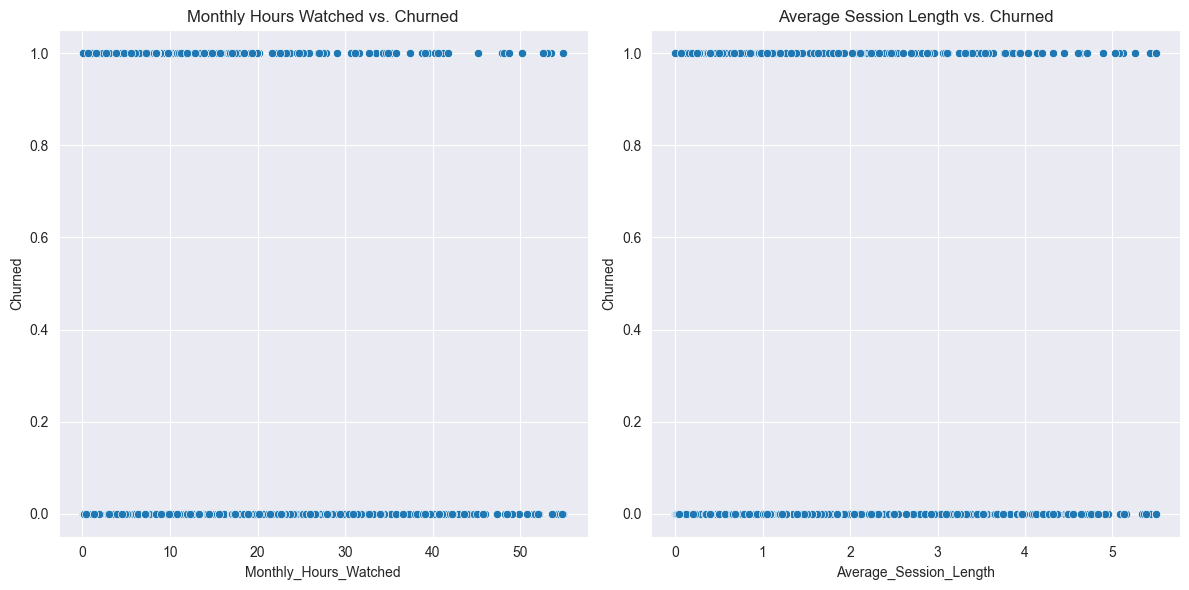

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots to visualize relationships
plt.figure(figsize=(12, 6))

# Monthly_Hours_Watched vs. Churned
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Monthly_Hours_Watched'], y=df['Churned'])
plt.title('Monthly Hours Watched vs. Churned')

# Average_Session_Length vs. Churned
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Average_Session_Length'], y=df['Churned'])
plt.title('Average Session Length vs. Churned')

plt.tight_layout()
plt.show()


In [17]:
# Calculate correlation matrix
correlation_matrix = df[['Monthly_Hours_Watched', 'Average_Session_Length', 'Churned']].corr()

# Display correlation matrix
print(correlation_matrix)


                        Monthly_Hours_Watched  Average_Session_Length  \
Monthly_Hours_Watched                1.000000               -0.014099   
Average_Session_Length              -0.014099                1.000000   
Churned                             -0.038321                0.010263   

                         Churned  
Monthly_Hours_Watched  -0.038321  
Average_Session_Length  0.010263  
Churned                 1.000000  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['Monthly_Hours_Watched', 'Average_Session_Length']]
y = df['Churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.22019071220128772
R-squared: -0.029409594208918977


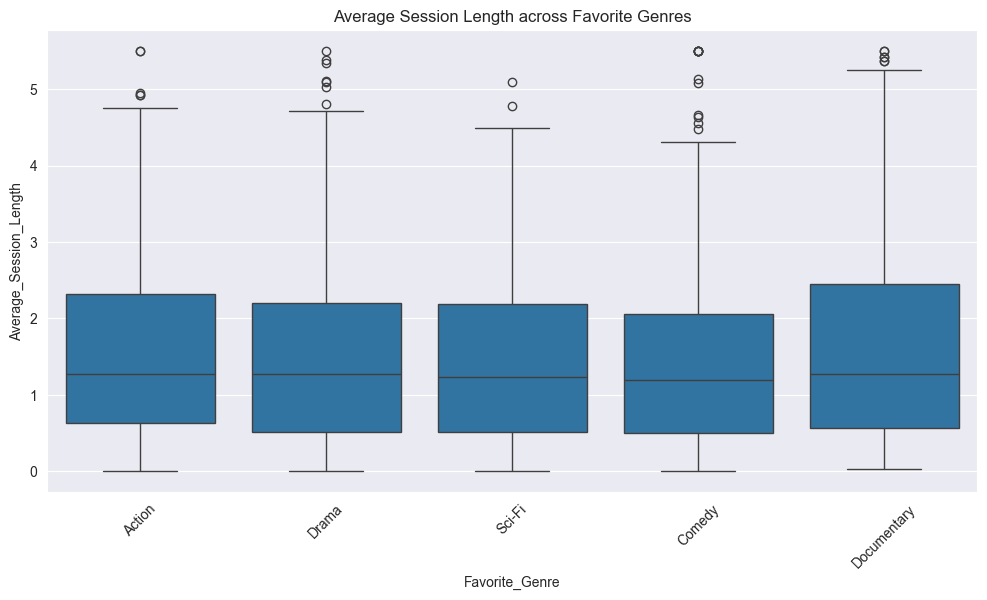

In [19]:
# Create a box plot for Average_Session_Length across Favorite_Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Average_Session_Length', data=df)
plt.title('Average Session Length across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

In [20]:
import scipy.stats as stats

# Perform ANOVA test
genres = df['Favorite_Genre'].unique()
session_lengths = [df[df['Favorite_Genre'] == genre]['Average_Session_Length'] for genre in genres]

anova_result = stats.f_oneway(*session_lengths)
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')


ANOVA F-statistic: 0.8622072511201928, p-value: 0.48608682675886916


In [21]:
# Calculate the average session length for each genre
genre_session_length = df.groupby('Favorite_Genre')['Average_Session_Length'].mean().reset_index()

# Display the results
print(genre_session_length)


  Favorite_Genre  Average_Session_Length
0         Action                1.615445
1         Comedy                1.519317
2    Documentary                1.712659
3          Drama                1.615571
4         Sci-Fi                1.487262


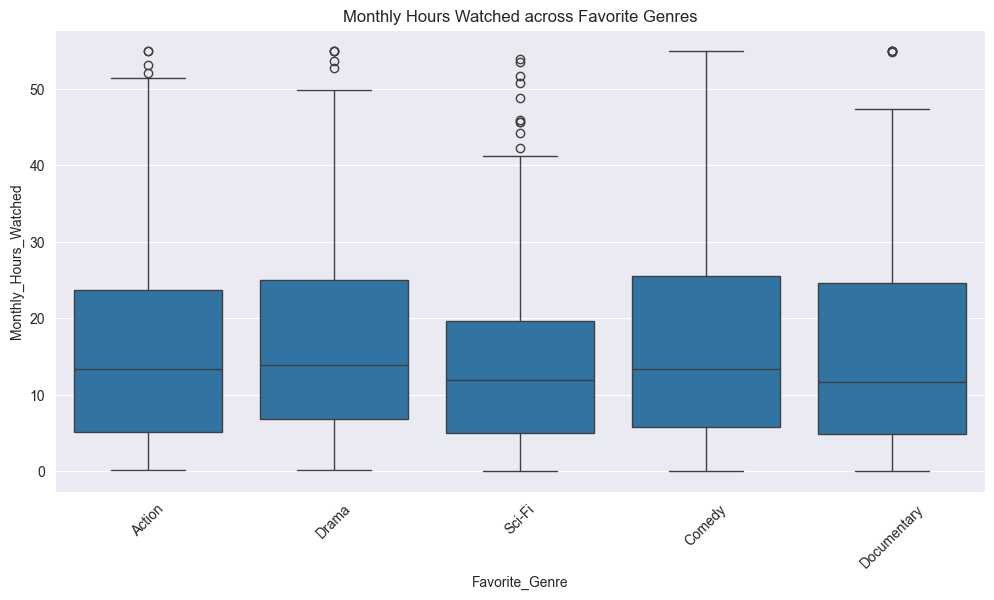

In [22]:
# Create a box plot for Average_Session_Length across Favorite_Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Monthly_Hours_Watched', data=df)
plt.title('Monthly Hours Watched across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

In [23]:
import scipy.stats as stats

# Perform ANOVA test
genres = df['Favorite_Genre'].unique()
session_lengths = [df[df['Favorite_Genre'] == genre]['Monthly_Hours_Watched'] for genre in genres]

anova_result = stats.f_oneway(*session_lengths)
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 1.6494012636846411, p-value: 0.15967018350765522


In [24]:
# Calculate the monthly hours watched for each genre
genre_session_length = df.groupby('Favorite_Genre')['Monthly_Hours_Watched'].mean().reset_index()

# Display the results
print(genre_session_length)


  Favorite_Genre  Monthly_Hours_Watched
0         Action              16.075487
1         Comedy              17.041409
2    Documentary              15.527808
3          Drama              17.269944
4         Sci-Fi              14.272355


In [25]:
# Count the frequency of each device
device_counts = df['Devices_Used'].value_counts()

# Display the results
print(device_counts)


Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64


/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_98754/1047371139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')


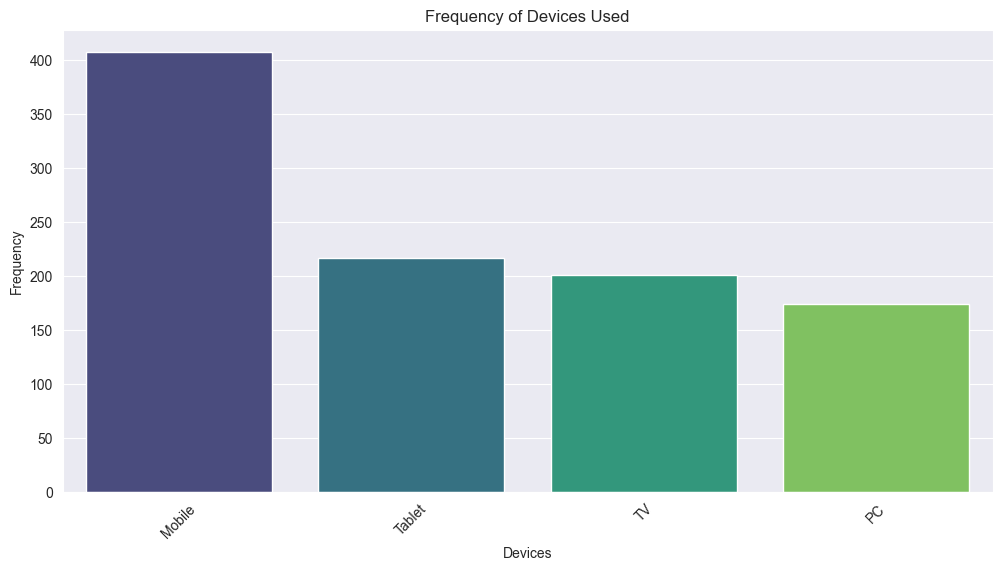

In [26]:
# Create a bar plot for the frequency of each device
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
plt.title('Frequency of Devices Used')
plt.xlabel('Devices')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Count the frequency of each favorite genre
genre_counts = df['Favorite_Genre'].value_counts()

# Display the results
print(genre_counts)


Favorite_Genre
Drama          212
Action         205
Comedy         203
Sci-Fi         192
Documentary    188
Name: count, dtype: int64


/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_98754/3219216083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


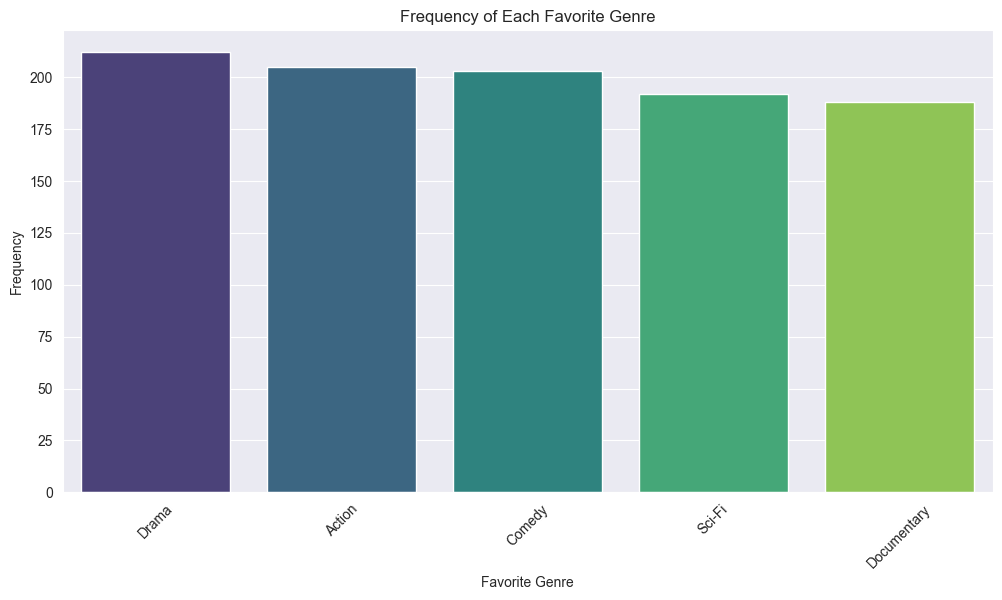

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the frequency of each favorite genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frequency of Each Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Count the frequency of each favorite genre
genre_counts = df['Favorite_Genre'].value_counts()

# Identify the most favorite genre
most_favorite_genre = genre_counts.idxmax()
most_favorite_genre_count = genre_counts.max()

# Print the most favorite genre and its count
print(f'The most favorite genre is: {most_favorite_genre} with {most_favorite_genre_count} users.')


The most favorite genre is: Drama with 212 users.


In [31]:
# Print the most favorite genre and its count
print(f'The most favorite genre is: {most_favorite_genre} with {most_favorite_genre_count} users.')

The most favorite genre is: Drama with 212 users.


In [ ]:
# Create a contingency table
device_genre_crosstab = pd.crosstab(df['Devices_Used'], df['Favorite_Genre'])

# Display the contingency table
print(device_genre_crosstab)

In [ ]:
# Create a contingency table and normalize it to percentages
device_genre_crosstab_percentage = pd.crosstab(df['Devices_Used'], df['Favorite_Genre'], normalize='index') * 100

# Display the contingency table with percentages
print(device_genre_crosstab_percentage)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the relationship between devices used and favorite genres in percentages
plt.figure(figsize=(12, 8))
sns.heatmap(device_genre_crosstab_percentage, annot=True, fmt='.2f', cmap='viridis')
plt.title('Percentage Heatmap of Devices Used by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Devices Used')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a heatmap for the relationship between devices used and favorite genres
plt.figure(figsize=(12, 8))
sns.heatmap(device_genre_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Devices Used by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Devices Used')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the average age for each genre
genre_age_stats = df.groupby('Favorite_Genre')['Age'].mean().reset_index()

# Display the results
print(genre_age_stats)


In [ ]:
# Create a box plot for Age across Favorite_Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Age', data=df)
plt.title('Age Distribution across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_age = df['Age'].mean()

In [ ]:
print(f'The average age is: {average_age:.2f} years old')